In [1]:
import numpy as np
import matplotlib.pyplot as plt

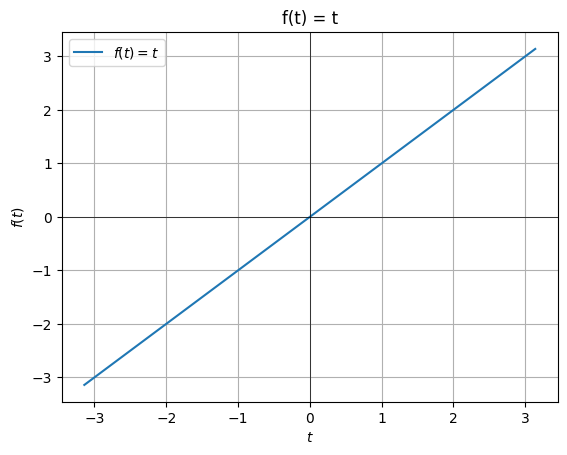

In [20]:
def sawtooth_wave(t):
    return t


t = np.linspace(-np.pi, np.pi, 500)
f_t = sawtooth_wave(t)

plt.plot(t, f_t, label=r"$f(t) = t$")
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.title("f(t) = t")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

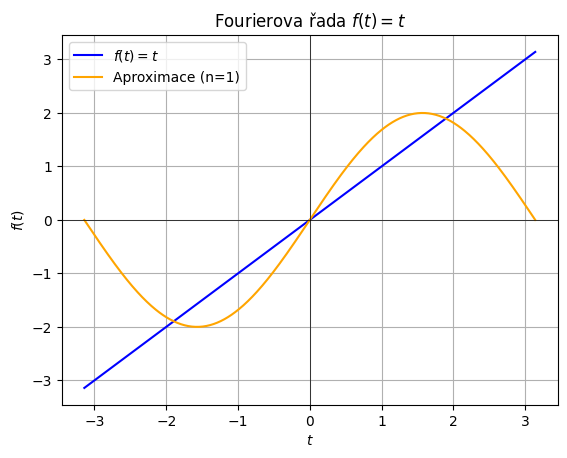

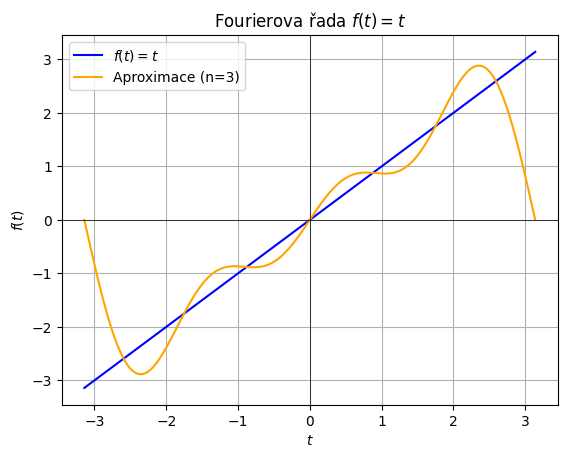

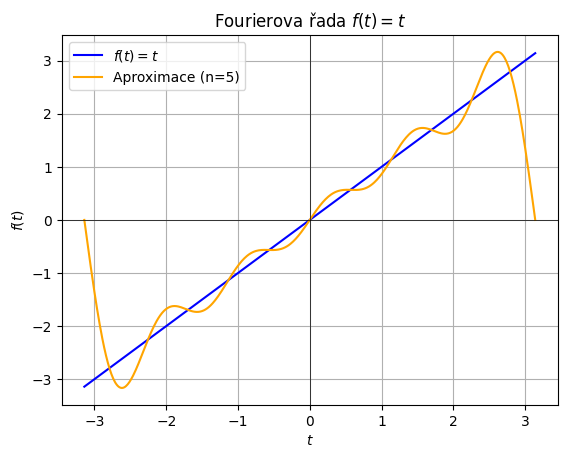

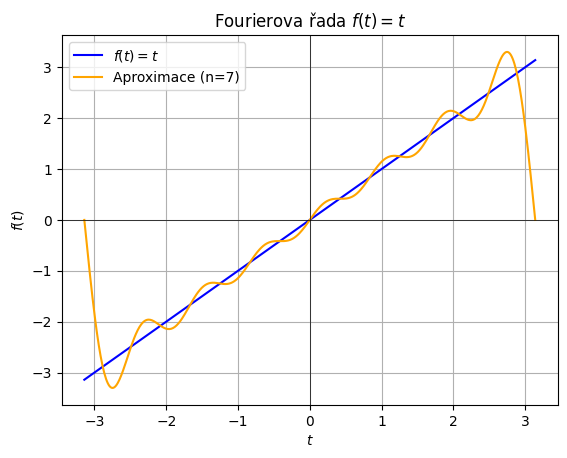

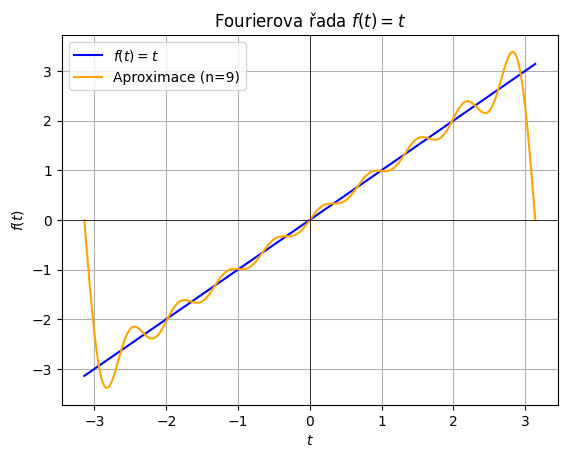

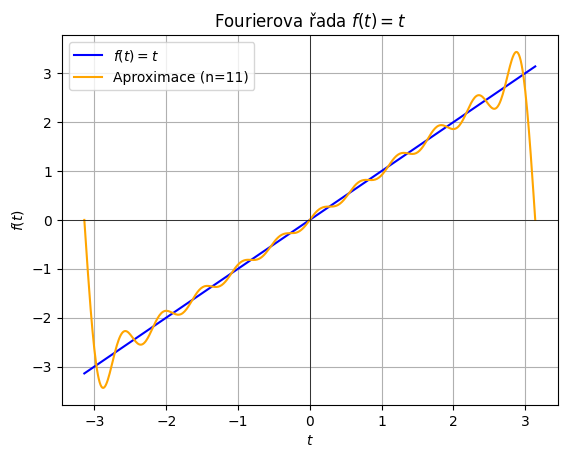

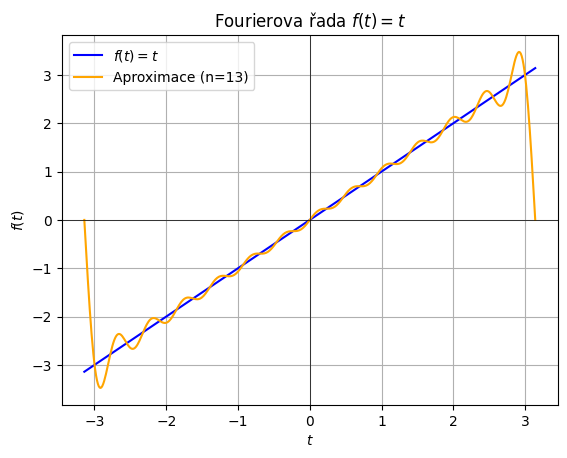

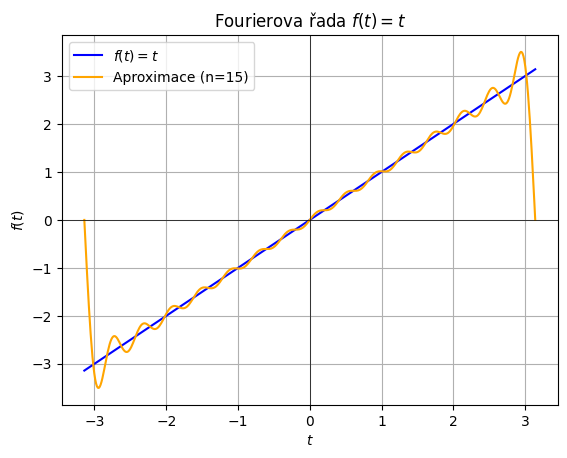

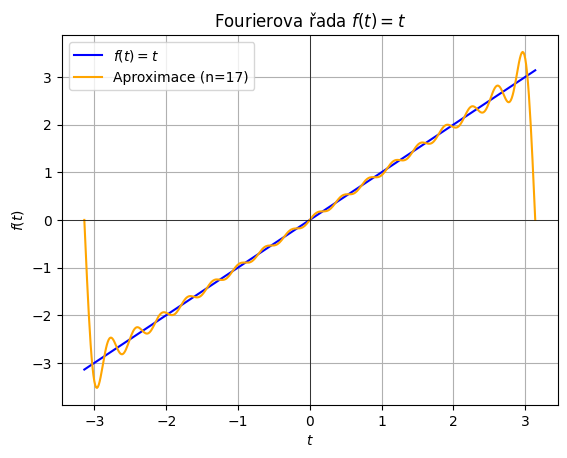

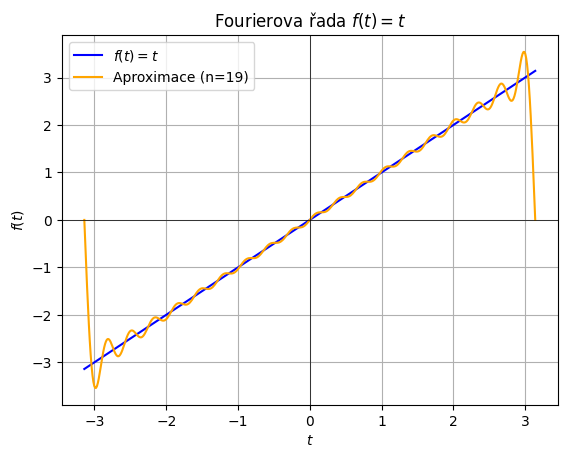

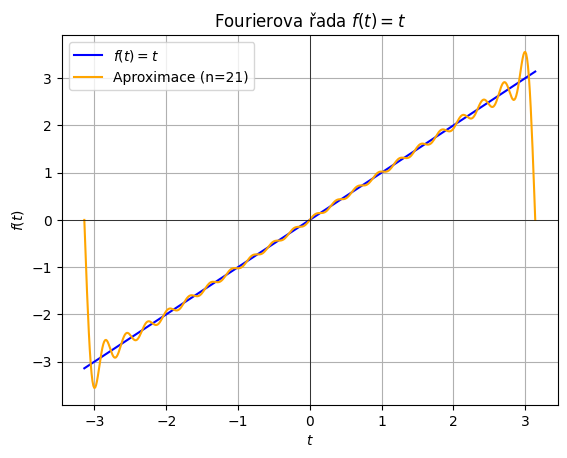

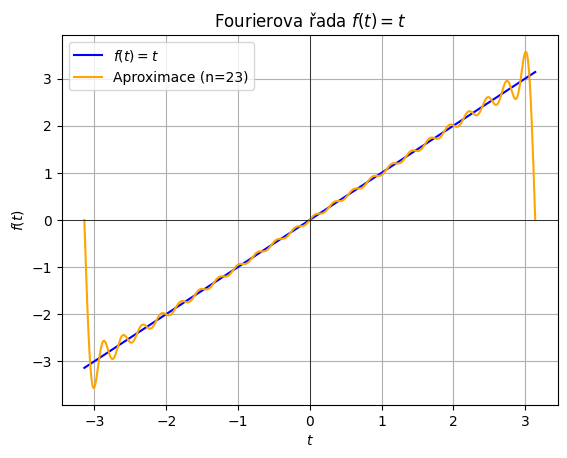

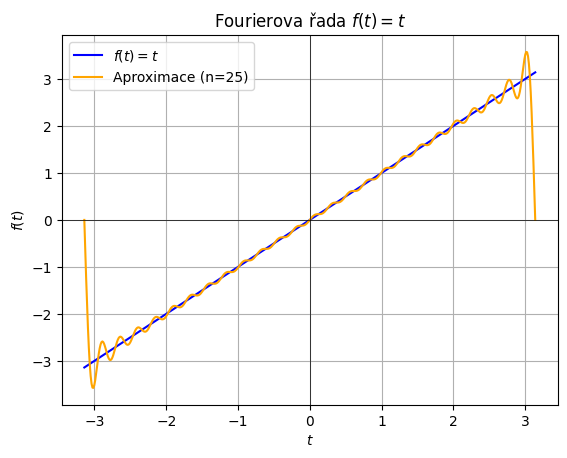

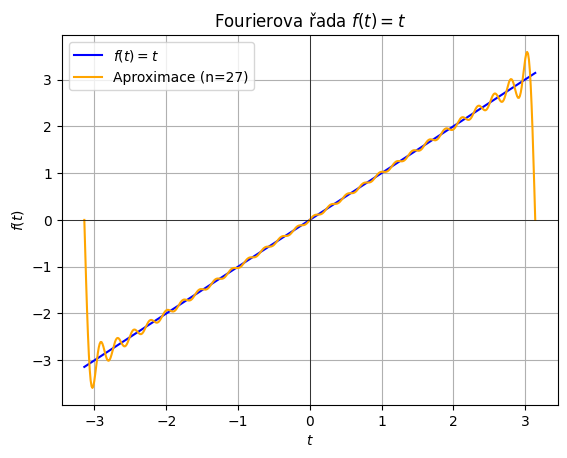

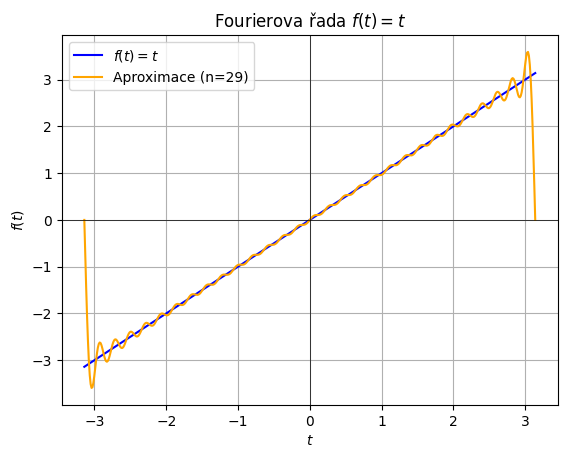

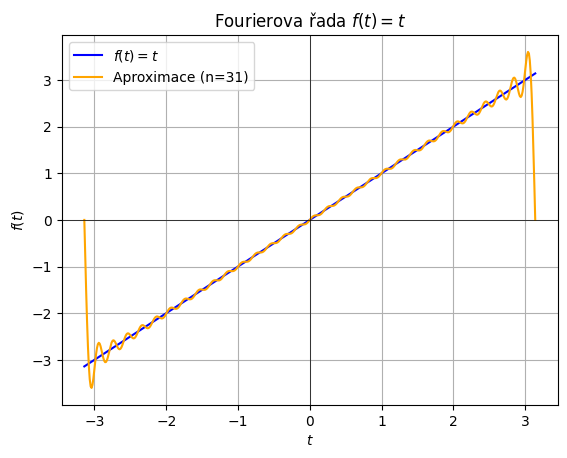

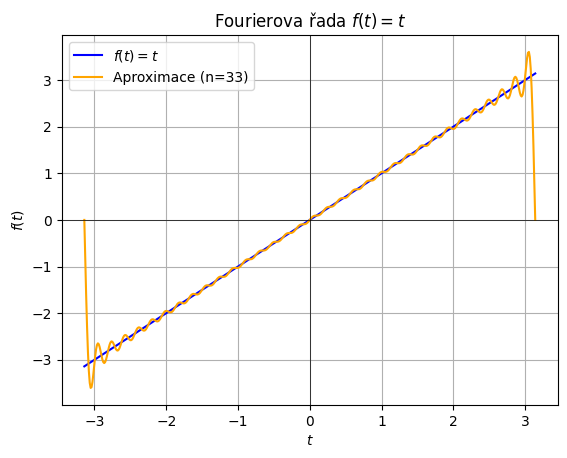

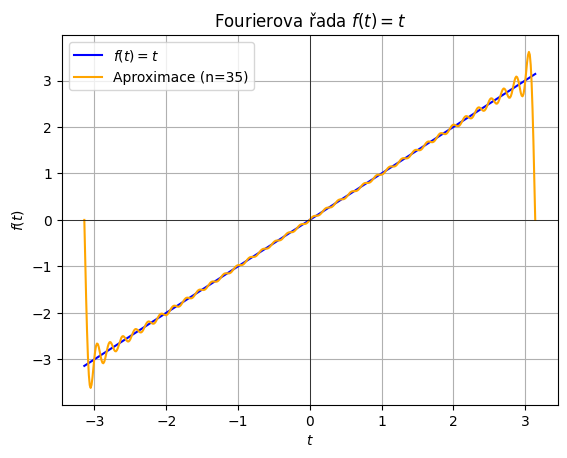

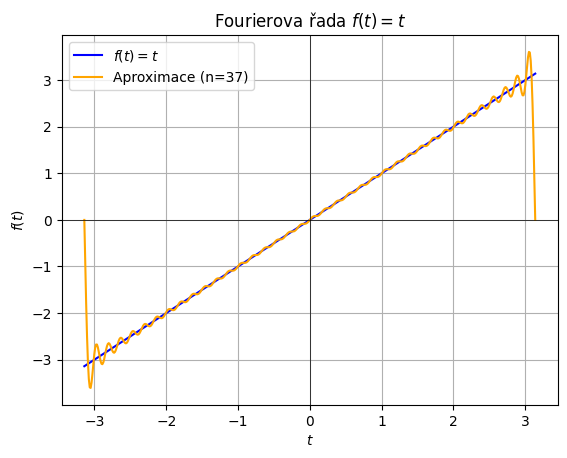

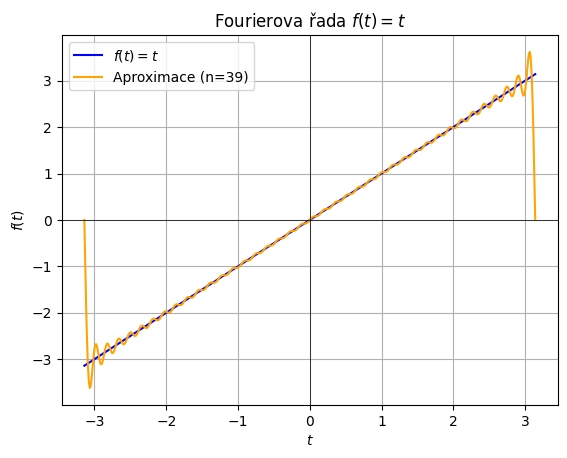

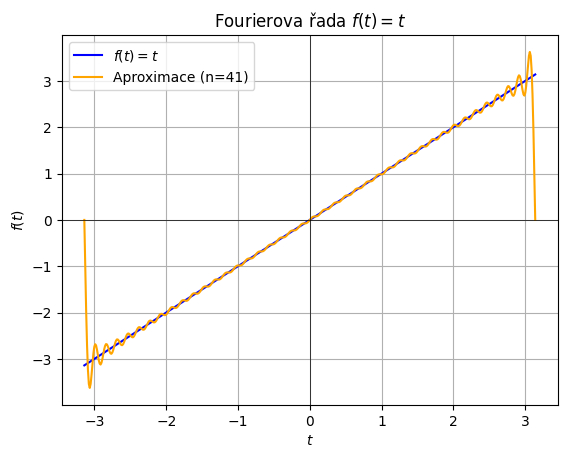

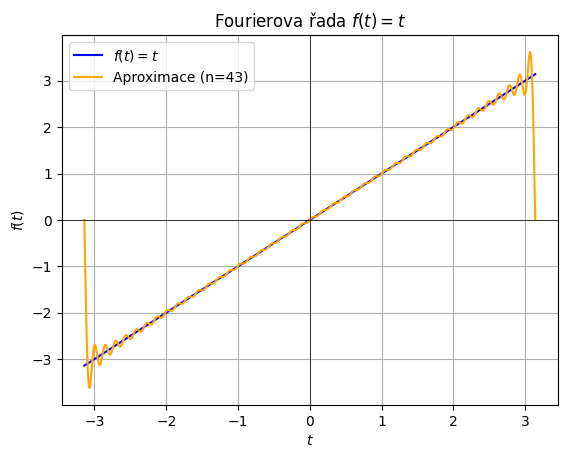

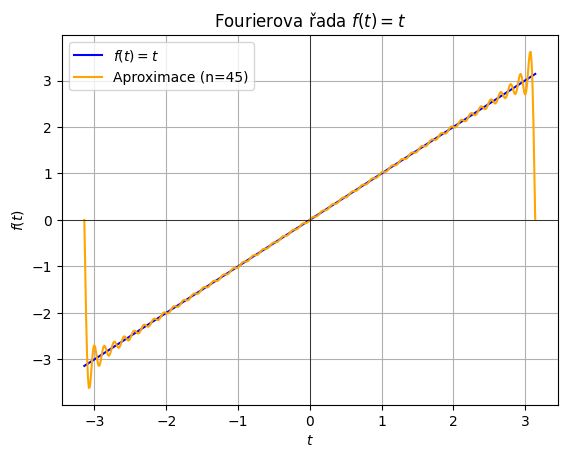

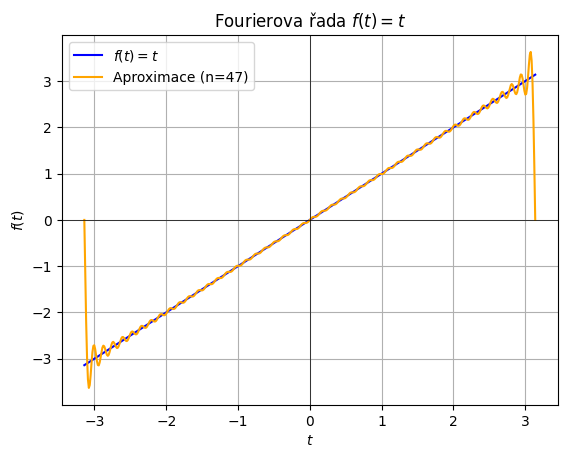

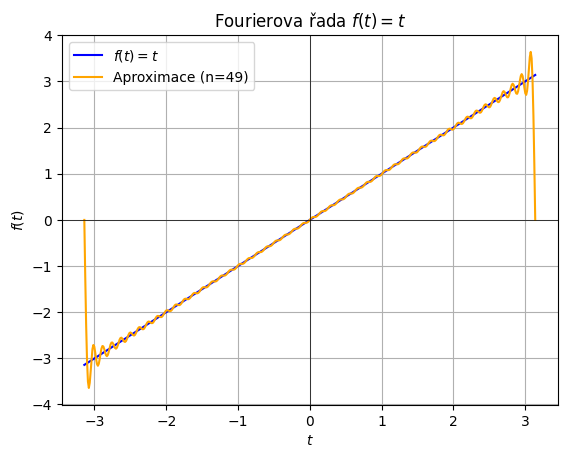

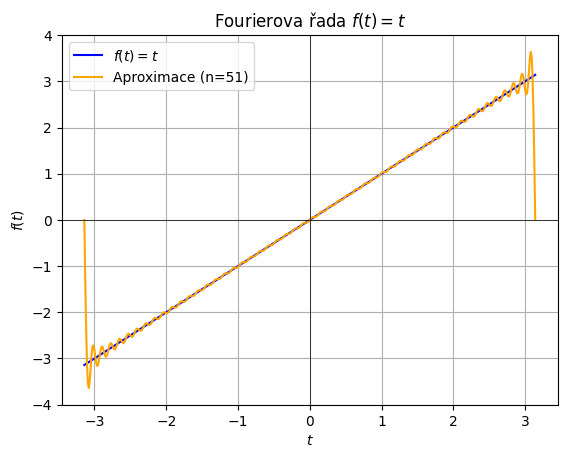

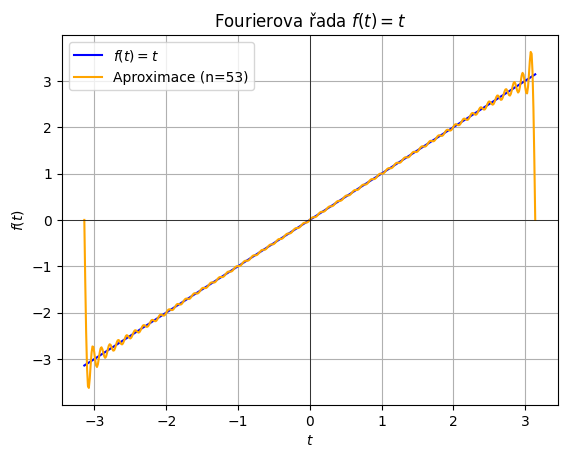

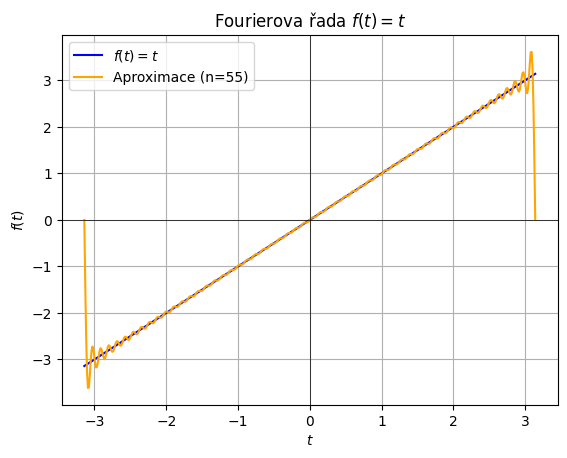

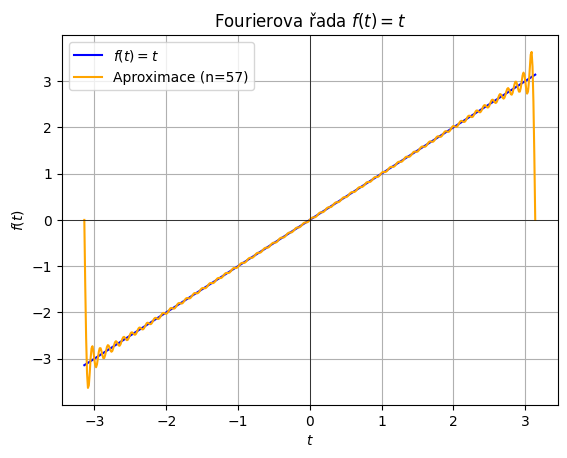

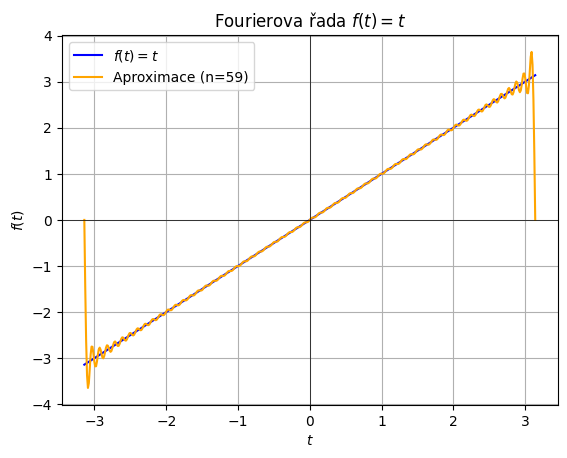

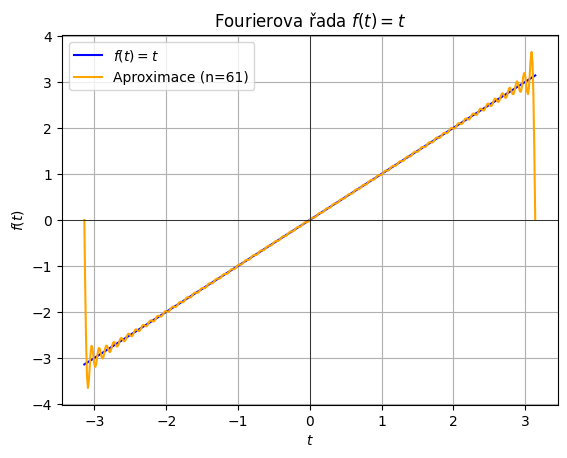

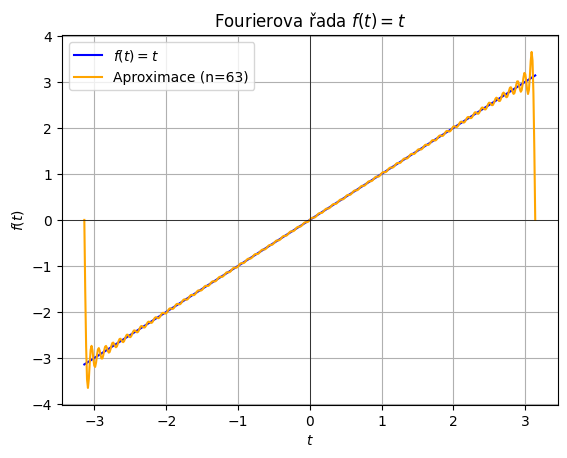

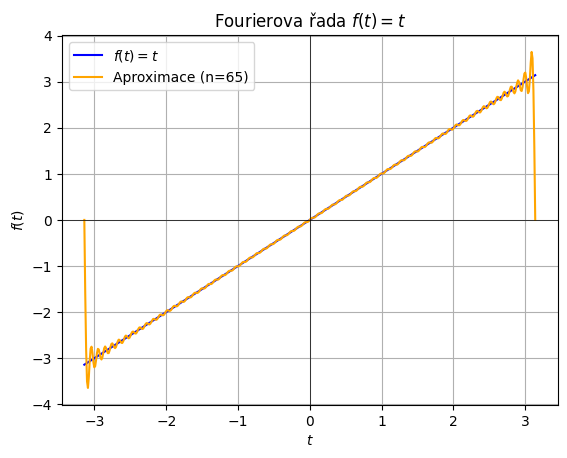

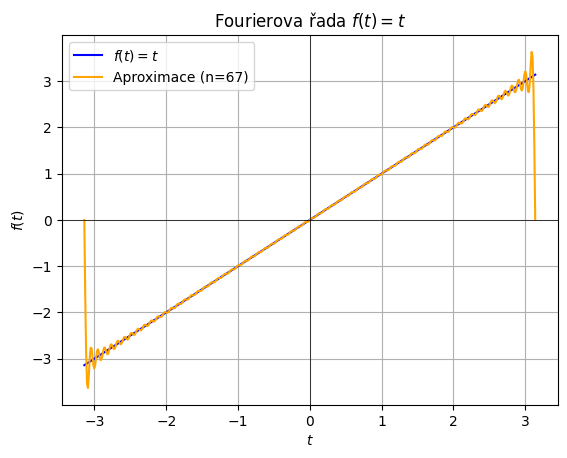

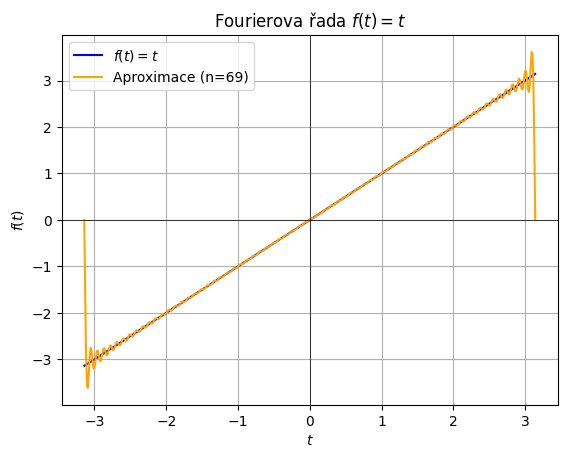

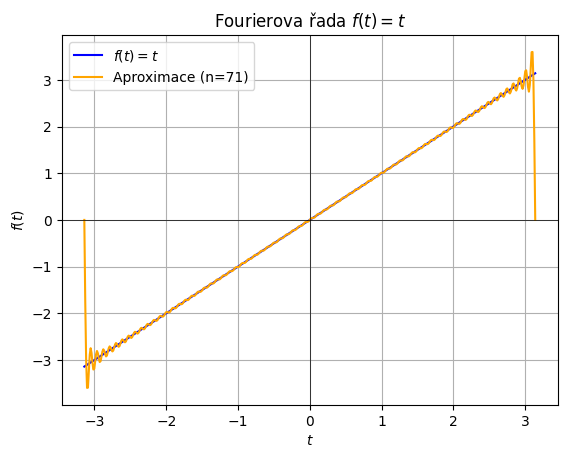

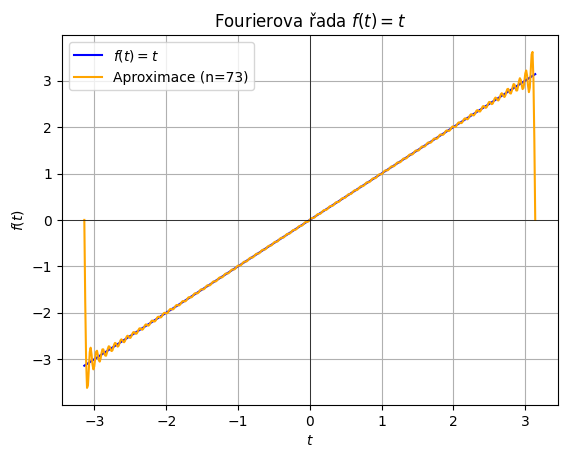

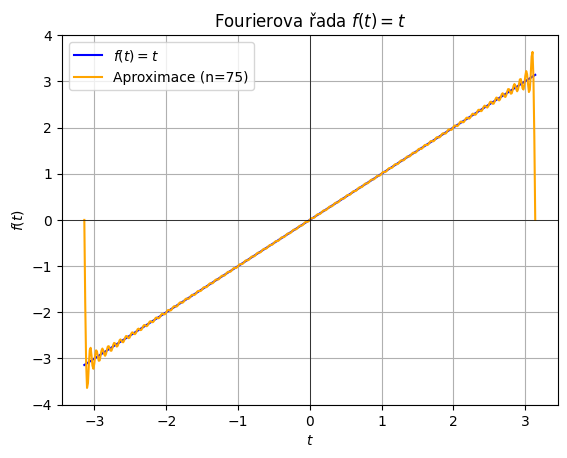

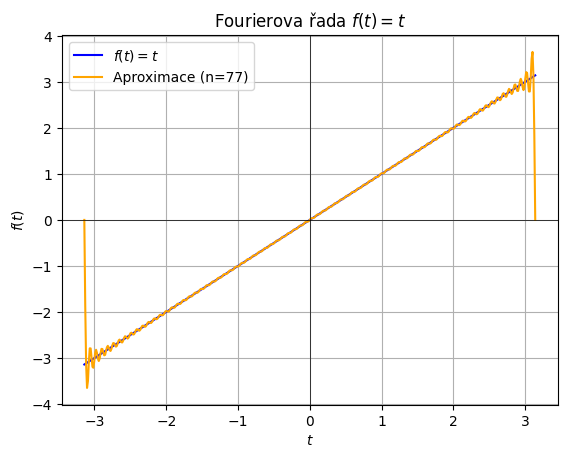

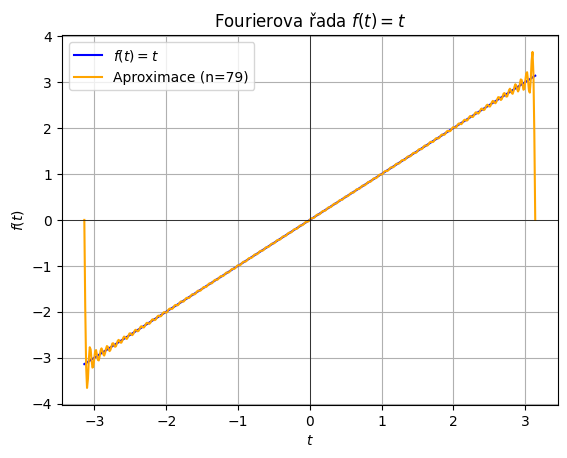

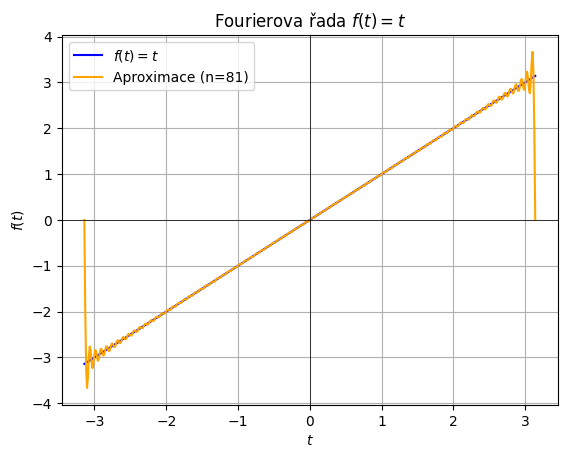

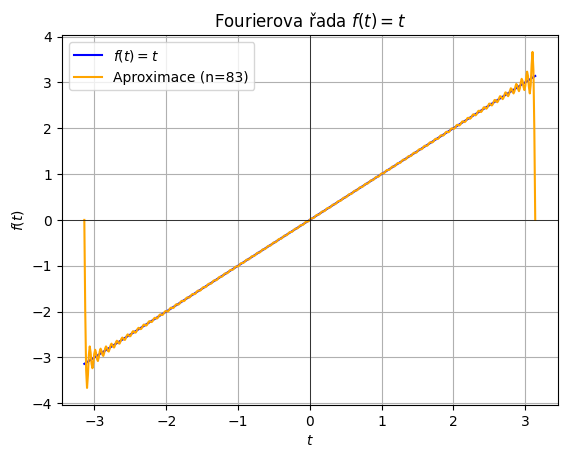

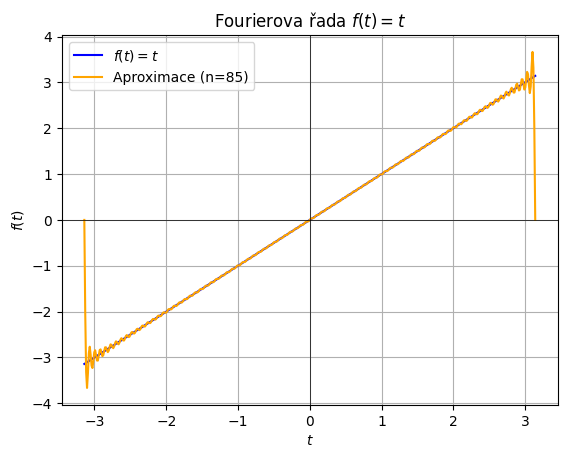

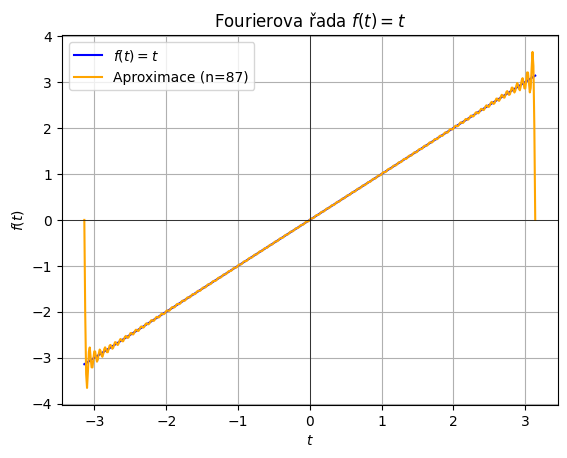

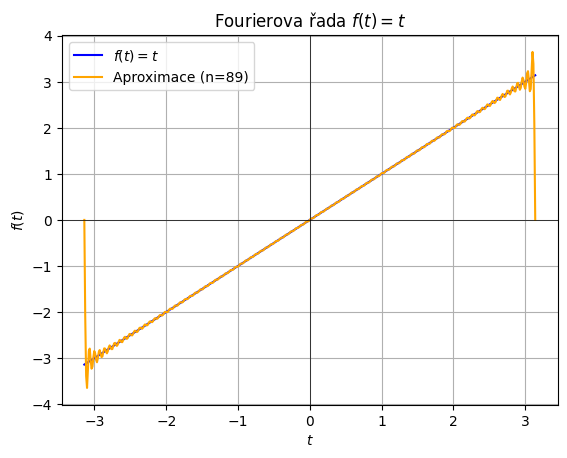

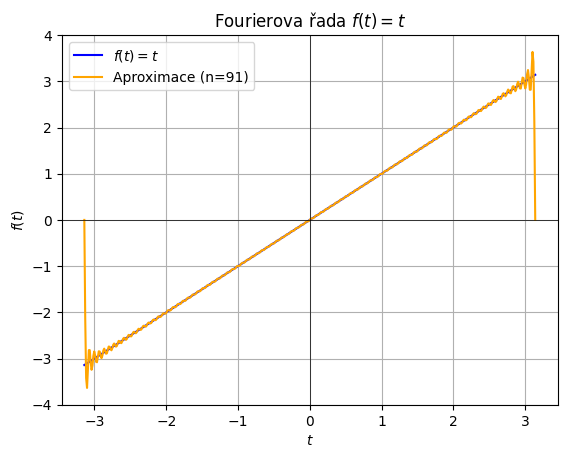

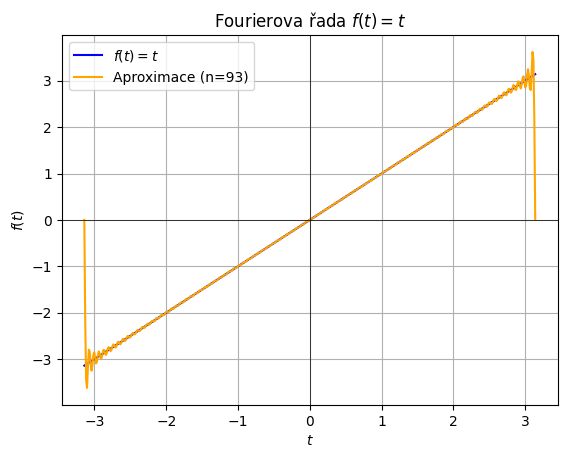

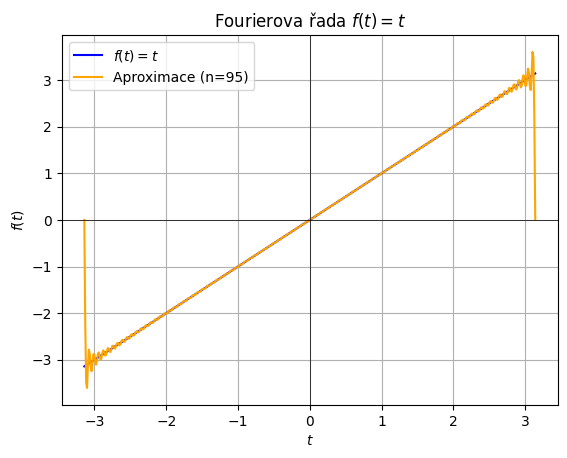

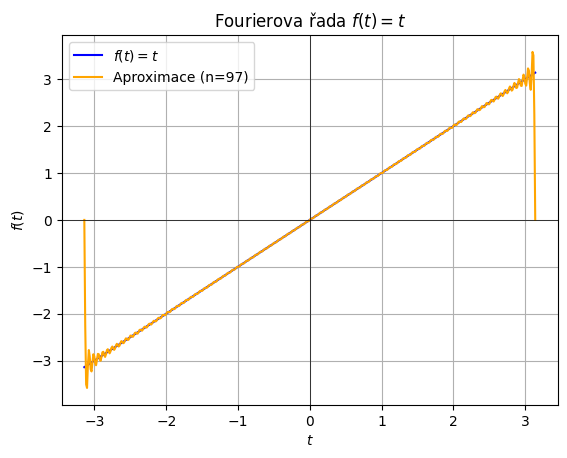

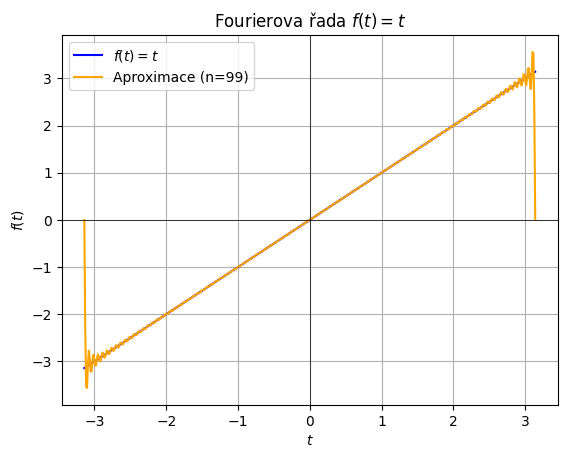

In [ ]:
def sawtooth_wave(t):
    return t


def b_n(n):
    b_n = (-2 / n) * np.cos(n * np.pi)
    return np.array(b_n)


def fourier(n=1):
    t = np.linspace(-np.pi, np.pi, 500)
    f_t_fourier = np.zeros_like(t)
    for i in range(1, n + 1):
        f_t_fourier += b_n(i) * np.sin(i * t)
    return f_t_fourier


f_t = sawtooth_wave(t)
for i in range(1, 100, 2):
    f_t_fourier = fourier(n=i)
    plt.plot(t, f_t, label=r"$f(t) = t$", color="blue")
    plt.plot(t, f_t_fourier, label=f"Aproximace (n={i})", color="orange")
    plt.xlabel(r"$t$")
    plt.ylabel(r"$f(t)$")
    plt.title("Fourierova řada $f(t) = t$")
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()

# Fourierova řada má problém s místy, kde není definovaná derivace (neexistuje spojitá derivace)
# Směrem do středu se aproximace s počtem členů zlepšuje, na okrajích se naopak zhoršuje
# Metoda fourier_series z sympy (dobrá pro vizualizaci toho, jak by ta fourierova řada mohla vypadat a lze z ní získat obecný vzorec pro naši funkci)

In [ ]:
import numpy as np


def s(t):
    return 5 + 2 * np.cos(2 * np.pi * t - np.pi / 2) + 3 * np.cos(4 * np.pi * t)


f_vzorkovaci = 4
T_vzorkovaci = 1 / f_vzorkovaci
t_vzorky = np.array([0, T_vzorkovaci, 2 * T_vzorkovaci, 3 * T_vzorkovaci])
signal = s(t_vzorky)
vysledky = np.fft.fft(signal)

print(vysledky)

# Generate a simple signal with noise

[20.+0.j  0.-4.j 12.+0.j  0.+4.j]


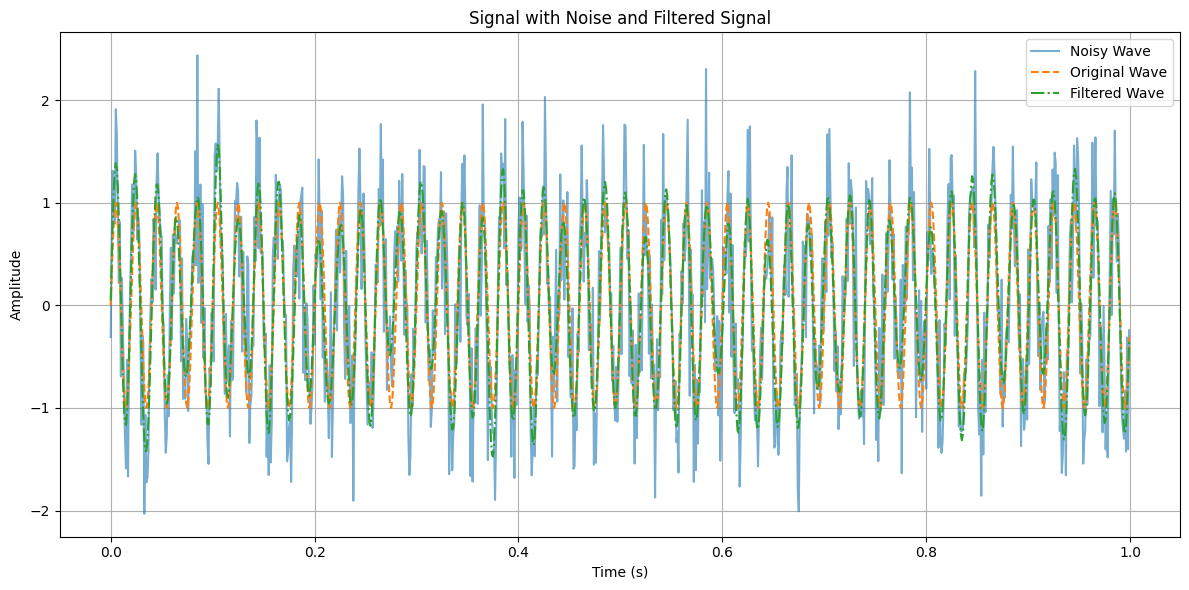

In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Nosná vlna
def nosna_vlna(A0, f, tvec):
    """Vytvoří nosnou vlnu."""
    return A0 * np.sin(2 * np.pi * f * tvec)


# Generování časového vektoru
fs = 1000  # Vzorkovací frekvence
T = 1  # Délka signálu v sekundách
tvec = np.linspace(0, T, int(fs * T), endpoint=False)

# Parametry nosné vlny
A0 = 1
f = 50  # Frekvence nosné vlny

# Generování nosné vlny
wave = nosna_vlna(A0, f, tvec)

# Přidání šumu
noise_amplitude = 0.5
noise = noise_amplitude * np.random.normal(size=len(tvec))
noisy_wave = wave + noise

# Odstranění šumu pomocí FFT
fft_wave = np.fft.fft(noisy_wave)
frequencies = np.fft.fftfreq(len(tvec), d=1 / fs)
fft_wave[np.abs(frequencies) > f * 1.5] = (
    0  # Odstranění frekvencí vyšších než 1.5 * f nosné vlny
)
filtered_wave = np.fft.ifft(fft_wave).real

# Vizualizace
plt.figure(figsize=(12, 6))
plt.plot(tvec, noisy_wave, label="Noisy Wave", alpha=0.6)
plt.plot(tvec, wave, label="Original Wave", linestyle="--")
plt.plot(tvec, filtered_wave, label="Filtered Wave", linestyle="-.")
plt.title("Signal with Noise and Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()